In [25]:
from auto_encoder import AutoEncoder
from masked_dataset import CIFAR10DataModule
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch
%reload_ext autoreload 
%autoreload 2

In [14]:
# load checkpoint
checkpoint = "./lightning_logs/version_1/checkpoints/last.ckpt"
autoencoder = AutoEncoder.load_from_checkpoint(checkpoint)

# choose your trained nn.Module
autoencoder.eval()

cifar10 = CIFAR10DataModule()
cifar10.setup(stage="predict")

Found cached dataset cifar10 (/Users/barissen/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


  0%|          | 0/2 [00:00<?, ?it/s]

In [15]:
train_dataloader = cifar10.train_dataloader()

In [20]:
for masked_input, full_input, unmasked_indices in train_dataloader:
  output = autoencoder(masked_input)
  masked_input = masked_input.reshape(masked_input.shape[0], masked_input.shape[1], 224, 224)
  full_input = full_input.reshape(masked_input.shape[0], masked_input.shape[1], 224, 224)
  output = output.reshape(masked_input.shape[0], masked_input.shape[1], 224, 224)
  break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


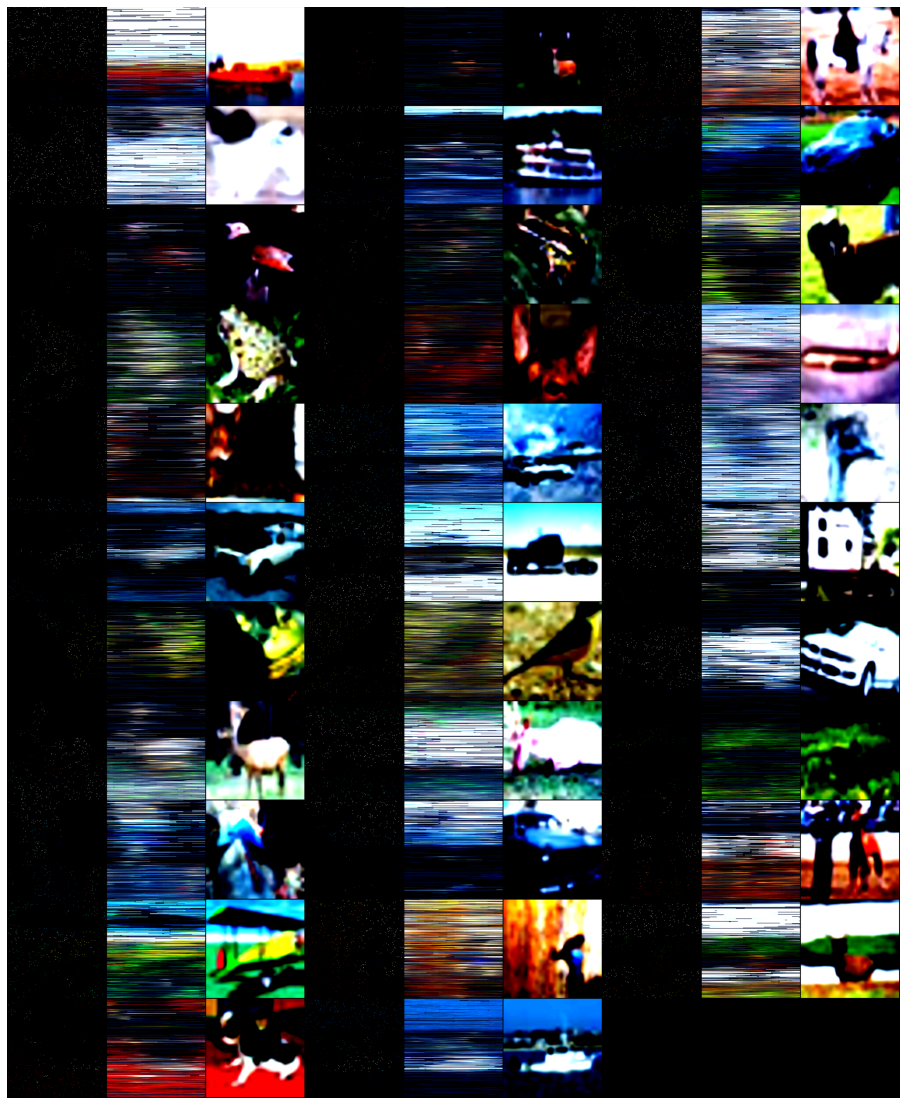

In [45]:
side_by_side = torch.zeros([96, 3, 224, 224])
for i in range(32):
    side_by_side[i * 3] = masked_input[i]
    side_by_side[i * 3 + 1] = output[i]
    side_by_side[i * 3 + 2] = full_input[i]

plt.figure(figsize=(16, 64))
plt.axis('off')
plt.imshow(make_grid(side_by_side, nrow=9).permute((1, 2, 0)))
